# Using MACD to generate Buy/Sell signals

In [1]:
# Import libraries

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
# import the data

NVR = pdr.get_data_yahoo('NVR',start='2021-01-01',end='2021-12-31')
NVR

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900


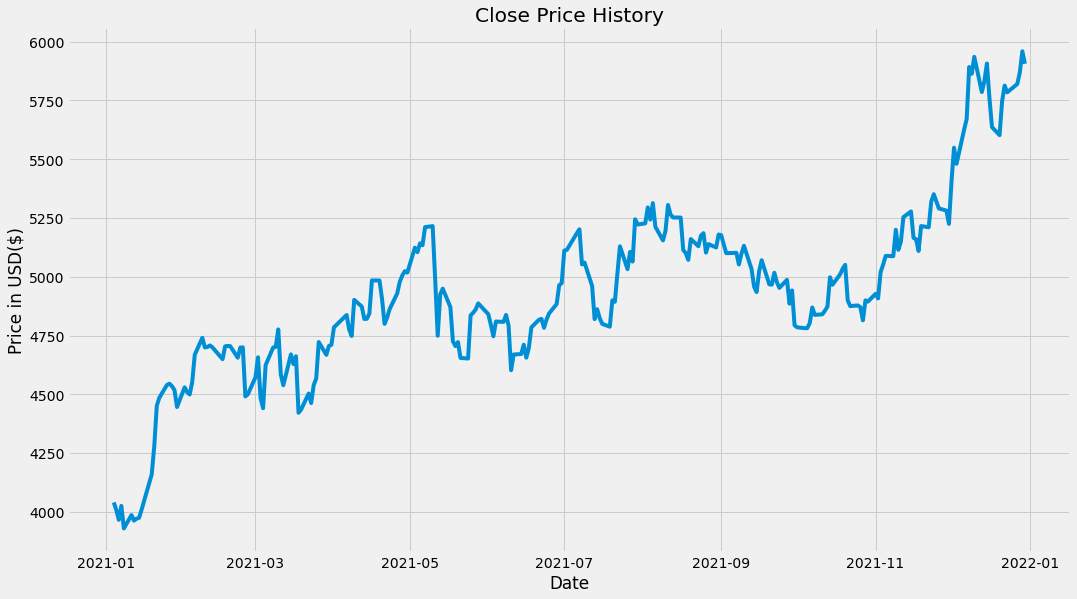

In [5]:
# visualizing the stock price

plt.figure(figsize=(16,9))
plt.plot(NVR['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price in USD($)')
plt.show()

In [6]:
# calculating MACD and signal indicators
short_ema = NVR['Close'].ewm(span=12, adjust=False).mean()
long_ema = NVR['Close'].ewm(span=26, adjust=False).mean()

MACD = short_ema - long_ema

signal = MACD.ewm(span=9, adjust=False).mean()

In [20]:
short_ema

Date
2021-01-04    4040.649902
2021-01-05    4035.766827
2021-01-06    4025.108852
2021-01-07    4025.235172
2021-01-08    4010.583607
                 ...     
2021-12-23    5724.080726
2021-12-27    5738.848280
2021-12-28    5758.943962
2021-12-29    5789.772595
2021-12-30    5807.658317
Name: Close, Length: 251, dtype: float64

In [21]:
signal

Date
2021-01-04      0.000000
2021-01-05     -0.506393
2021-01-06     -1.979268
2021-01-07     -3.027865
2021-01-08     -5.279167
                 ...    
2021-12-23    159.377941
2021-12-27    155.230221
2021-12-28    151.942125
2021-12-29    150.452548
2021-12-30    148.975046
Name: Close, Length: 251, dtype: float64

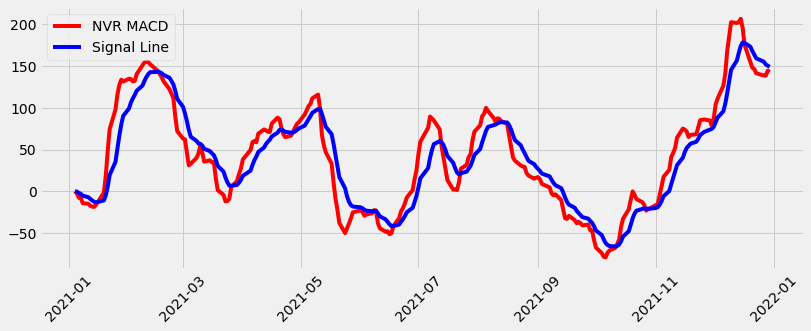

In [9]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(NVR.index, MACD, label='NVR MACD', color='red')
plt.plot(NVR.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [10]:
# creating new columns in the df
NVR['MACD']=MACD
NVR['Signal Line']=signal
NVR

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700,0.000000,0.000000
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,-2.531965,-0.506393
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,-7.870769,-1.979268
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,-7.222250,-3.027865
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,-14.284376,-5.279167
...,...,...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400,141.460657,159.377941
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,138.639340,155.230221
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,138.789743,151.942125


In [37]:
# Creating a function for buy/sell signal

def buy_sell(signal):
    buy=[]
    sell=[]
    flag=-1
    
    for i in range(0, len(signal)): # to check if macd line corsses signal line
        if signal['MACD'][i]> signal['Signal Line'][i]:
            sell.append(np.nan)
            if flag !=1:
                buy.append(signal['Close'][i])
                flag=1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i]< signal['Signal Line'][i]: # when signal line crosses macd line
            buy.append(np.nan)
            if flag !=0:
                sell.append(signal['Close'][i])
                flag=0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return (buy,sell)

In [42]:
# creating a new column for buy/sell

a=buy_sell(NVR)
NVR['buy_signal_price']=a[0]
NVR['sell_signal_price']=a[1]
NVR

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,buy_signal_price,sell_signal_price
Date,,,,,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700,0.000000,0.000000,NaN,NaN
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,-2.531965,-0.506393,NaN,4008.909912
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,-7.870769,-1.979268,NaN,NaN
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,-7.222250,-3.027865,NaN,NaN
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,-14.284376,-5.279167,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400,141.460657,159.377941,NaN,NaN
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,138.639340,155.230221,NaN,NaN
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,138.789743,151.942125,NaN,NaN


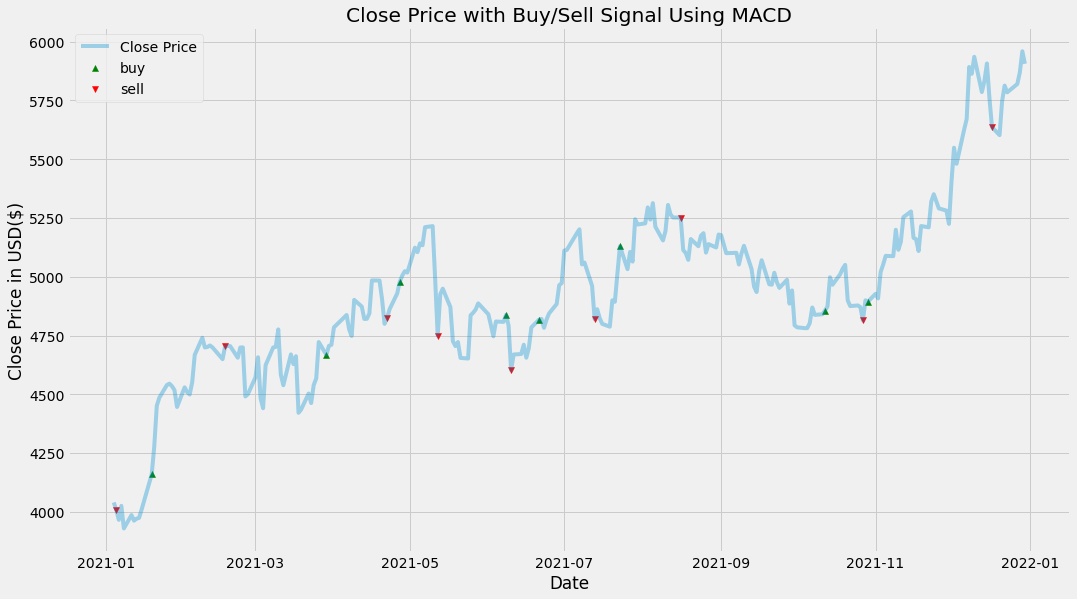

In [46]:
# visualizing the buy/sell signals with the tock data
plt.figure(figsize=(16,9))
plt.scatter(NVR.index,NVR['buy_signal_price'], color='green', label='buy',marker='^',alpha=1)
plt.scatter(NVR.index,NVR['sell_signal_price'],color='red',label='sell',marker='v',alpha=1)
plt.plot(NVR['Close'],label='Close Price',alpha=0.35)
plt.title('Close Price with Buy/Sell Signal Using MACD')
plt.xlabel('Date')
plt.ylabel('Close Price in USD($)')
plt.legend(loc='upper left')
plt.show()

In [47]:
NVR

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,buy_signal_price,sell_signal_price
Date,,,,,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700,0.000000,0.000000,NaN,NaN
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,-2.531965,-0.506393,NaN,4008.909912
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,-7.870769,-1.979268,NaN,NaN
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,-7.222250,-3.027865,NaN,NaN
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,-14.284376,-5.279167,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400,141.460657,159.377941,NaN,NaN
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,138.639340,155.230221,NaN,NaN
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,138.789743,151.942125,NaN,NaN


In [48]:
buy_days = NVR[~NVR['buy_signal_price'].isnull()]
buy_days

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,buy_signal_price,sell_signal_price
Date,,,,,,,,,,
2021-01-19,4021.000000,4168.000000,4017.949951,4160.000000,4160.000000,31900,-1.670984,-10.997575,4160.000000,NaN
2021-03-29,4730.000000,4753.319824,4666.700195,4668.259766,4668.259766,18500,12.204649,7.609079,4668.259766,NaN
2021-04-27,4938.500000,5023.000000,4863.399902,4978.810059,4978.810059,27900,71.190994,70.436216,4978.810059,NaN
2021-06-08,4818.450195,4864.200195,4777.779785,4838.129883,4838.129883,14400,-22.659379,-23.685179,4838.129883,NaN
2021-06-21,4780.620117,4826.970215,4737.919922,4817.689941,4817.689941,18800,-32.207697,-39.869007,4817.689941,NaN
2021-07-23,5015.689941,5130.029785,4998.600098,5130.029785,5130.029785,10800,26.991815,21.509856,5130.029785,NaN
2021-10-12,4852.609863,4877.000000,4812.759766,4856.250000,4856.250000,9500,-63.384288,-65.576398,4856.250000,NaN
2021-10-29,4878.100098,4916.040039,4867.910156,4894.799805,4894.799805,14800,-20.454164,-20.894638,4894.799805,NaN


In [49]:
sell_days = NVR[~NVR['sell_signal_price'].isnull()]
sell_days

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,buy_signal_price,sell_signal_price
Date,,,,,,,,,,
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,-2.531965,-0.506393,NaN,4008.909912
2021-02-17,4626.140137,4727.580078,4600.000000,4704.399902,4704.399902,22000,140.679568,142.560815,NaN,4704.399902
2021-04-22,4787.000000,4836.209961,4757.500000,4826.370117,4826.370117,23400,68.354026,72.751303,NaN,4826.370117
2021-05-12,4950.009766,4954.979980,4749.339844,4749.370117,4749.370117,21700,67.205959,92.420688,NaN,4749.370117
2021-06-10,4787.799805,4787.799805,4596.970215,4602.939941,4602.939941,40900,-38.230600,-26.490804,NaN,4602.939941
2021-07-13,4933.459961,4945.660156,4800.169922,4820.290039,4820.290039,25100,53.743662,58.781648,NaN,4820.290039
2021-08-16,5249.990234,5283.600098,5204.009766,5252.100098,5252.100098,9800,80.836715,82.368320,NaN,5252.100098
2021-10-27,4899.810059,4923.950195,4803.910156,4815.000000,4815.000000,20500,-23.249598,-20.859062,NaN,4815.000000
2021-12-17,5752.270020,5752.270020,5609.290039,5636.779785,5636.779785,43900,175.445199,177.807590,NaN,5636.779785


In [50]:
bs_df = pd.concat([buy_days,sell_days]).sort_index()
bs_df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,buy_signal_price,sell_signal_price
Date,,,,,,,,,,
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,-2.531965,-0.506393,NaN,4008.909912
2021-01-19,4021.000000,4168.000000,4017.949951,4160.000000,4160.000000,31900,-1.670984,-10.997575,4160.000000,NaN
2021-02-17,4626.140137,4727.580078,4600.000000,4704.399902,4704.399902,22000,140.679568,142.560815,NaN,4704.399902
2021-03-29,4730.000000,4753.319824,4666.700195,4668.259766,4668.259766,18500,12.204649,7.609079,4668.259766,NaN
2021-04-22,4787.000000,4836.209961,4757.500000,4826.370117,4826.370117,23400,68.354026,72.751303,NaN,4826.370117
2021-04-27,4938.500000,5023.000000,4863.399902,4978.810059,4978.810059,27900,71.190994,70.436216,4978.810059,NaN
2021-05-12,4950.009766,4954.979980,4749.339844,4749.370117,4749.370117,21700,67.205959,92.420688,NaN,4749.370117
2021-06-08,4818.450195,4864.200195,4777.779785,4838.129883,4838.129883,14400,-22.659379,-23.685179,4838.129883,NaN
2021-06-10,4787.799805,4787.799805,4596.970215,4602.939941,4602.939941,40900,-38.230600,-26.490804,NaN,4602.939941
